In [1]:
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import transforms
import matplotlib.pyplot as plt
import time
from glob import glob
import numpy as np
from PIL import Image
import torchvision

In [2]:
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.datasets import MNIST
from PIL import Image
import os
from pathlib import Path

In [3]:
from torch.utils.data import Dataset, DataLoader

In [4]:
import pandas as pd
safe_prod = pd.read_csv('../src/scraping/products_no_nsfw.csv')

In [4]:
import psycopg2

conn = psycopg2.connect(host="dbinstance.c6phnxzyppjs.us-west-2.rds.amazonaws.com",
                        database="muimui", user="marwa", password="muimuidb")

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [5]:
cur = conn.cursor()
cur.execute('SELECT id from products where is_nsfw=0')

In [6]:
listings = cur.fetchall()

In [7]:
listings = [str(x[0]) for x in listings]

In [8]:
len(listings)

28182

In [9]:
class VAEDataset(Dataset):
    def __init__(self, fpath, listings):
        files = list(Path(fpath).iterdir())
        self.fnames = [x for x in list(Path('../product_resized/').iterdir()) 
                       if str(x).split('/')[-1].split('.')[0] in listings]
        self.num_files = len(self.fnames)
        
    def __len__(self):
        return self.num_files
    
    def __getitem__(self, index):
        fname = str(self.fnames[index])
        x = imread(fname)
        x = resize(x)
        x = totensor(x)
        return x

In [10]:
def imread(fname):
    return Image.open(fname)

In [11]:
from torch.utils.data import Dataset, DataLoader

No need to run the following two lines, This is just for google colab.

In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
# !ls "/content/drive/My Drive"

1. Load the data

In [12]:
# train_ds = VAEDataset('/content/drive/My Drive/test')
train_ds = VAEDataset('../product_resized/', listings)

In [13]:
len(train_ds)

28180

In [14]:
learning_rate = 1*1e-5
# batch_size = len(train_ds)
batch_size = 32

In [15]:
sz = 512

In [16]:
totensor = transforms.ToTensor()
resize = transforms.Resize(sz)

In [17]:
train_loader = DataLoader(train_ds, batch_size=batch_size)

In [18]:
train_loader

Maybe change the hyperparameters for better performance.

In [21]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=5),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(8,16,kernel_size=5),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(16,32,kernel_size=6),
            nn.ReLU(True),
            nn.MaxPool2d(4, stride=4),
            nn.Conv2d(32,3,kernel_size=1),
            nn.ReLU(True))
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(3,32,kernel_size=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(32,32,stride=4,kernel_size=4),
            nn.ReLU(True),
            nn.ConvTranspose2d(32,32,kernel_size=6),
            nn.ReLU(True),
            nn.ConvTranspose2d(32,8,stride=2,kernel_size=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(8,8,stride=1,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(8,3,stride=2,kernel_size=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(3,3,stride=1,kernel_size=5),
            nn.ReLU(True),
            nn.Sigmoid())
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [22]:
num_epochs = 1 #you can go for more epochs, I am using a mac

In [23]:
model = Autoencoder()
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-5)

In [56]:
for epoch in range(num_epochs):
  for data in train_loader :
      img = data
      img = Variable(img) #.cpu()
      # ===================forward=====================
      output = model(img)
      loss = distance(output, img)
      # ===================backward====================
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  # ===================log========================
      print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss))

epoch [1/1], loss:0.0177
epoch [1/1], loss:0.0144
epoch [1/1], loss:0.0202
epoch [1/1], loss:0.0216
epoch [1/1], loss:0.0156
epoch [1/1], loss:0.0181
epoch [1/1], loss:0.0212
epoch [1/1], loss:0.0219
epoch [1/1], loss:0.0181
epoch [1/1], loss:0.0181
epoch [1/1], loss:0.0188
epoch [1/1], loss:0.0176
epoch [1/1], loss:0.0223
epoch [1/1], loss:0.0191
epoch [1/1], loss:0.0235
epoch [1/1], loss:0.0235
epoch [1/1], loss:0.0156
epoch [1/1], loss:0.0206
epoch [1/1], loss:0.0230
epoch [1/1], loss:0.0211
epoch [1/1], loss:0.0211
epoch [1/1], loss:0.0225
epoch [1/1], loss:0.0194
epoch [1/1], loss:0.0152
epoch [1/1], loss:0.0128
epoch [1/1], loss:0.0202
epoch [1/1], loss:0.0217
epoch [1/1], loss:0.0183
epoch [1/1], loss:0.0158
epoch [1/1], loss:0.0165
epoch [1/1], loss:0.0203
epoch [1/1], loss:0.0177
epoch [1/1], loss:0.0159
epoch [1/1], loss:0.0186
epoch [1/1], loss:0.0189
epoch [1/1], loss:0.0227
epoch [1/1], loss:0.0206
epoch [1/1], loss:0.0191
epoch [1/1], loss:0.0218
epoch [1/1], loss:0.0161


epoch [1/1], loss:0.0171
epoch [1/1], loss:0.0183
epoch [1/1], loss:0.0240
epoch [1/1], loss:0.0224
epoch [1/1], loss:0.0186
epoch [1/1], loss:0.0216
epoch [1/1], loss:0.0162
epoch [1/1], loss:0.0169
epoch [1/1], loss:0.0150
epoch [1/1], loss:0.0168
epoch [1/1], loss:0.0195
epoch [1/1], loss:0.0256
epoch [1/1], loss:0.0172
epoch [1/1], loss:0.0180
epoch [1/1], loss:0.0144
epoch [1/1], loss:0.0183
epoch [1/1], loss:0.0154
epoch [1/1], loss:0.0174
epoch [1/1], loss:0.0206
epoch [1/1], loss:0.0191
epoch [1/1], loss:0.0164
epoch [1/1], loss:0.0212
epoch [1/1], loss:0.0155
epoch [1/1], loss:0.0172
epoch [1/1], loss:0.0198
epoch [1/1], loss:0.0242
epoch [1/1], loss:0.0186
epoch [1/1], loss:0.0168
epoch [1/1], loss:0.0216
epoch [1/1], loss:0.0155
epoch [1/1], loss:0.0196
epoch [1/1], loss:0.0203
epoch [1/1], loss:0.0217
epoch [1/1], loss:0.0156
epoch [1/1], loss:0.0196
epoch [1/1], loss:0.0208
epoch [1/1], loss:0.0185
epoch [1/1], loss:0.0136
epoch [1/1], loss:0.0197
epoch [1/1], loss:0.0213


epoch [1/1], loss:0.0138
epoch [1/1], loss:0.0187
epoch [1/1], loss:0.0187
epoch [1/1], loss:0.0162
epoch [1/1], loss:0.0188
epoch [1/1], loss:0.0189
epoch [1/1], loss:0.0211
epoch [1/1], loss:0.0193
epoch [1/1], loss:0.0173
epoch [1/1], loss:0.0156
epoch [1/1], loss:0.0176
epoch [1/1], loss:0.0187
epoch [1/1], loss:0.0189
epoch [1/1], loss:0.0208
epoch [1/1], loss:0.0178
epoch [1/1], loss:0.0214
epoch [1/1], loss:0.0180
epoch [1/1], loss:0.0195
epoch [1/1], loss:0.0169
epoch [1/1], loss:0.0180
epoch [1/1], loss:0.0186
epoch [1/1], loss:0.0191
epoch [1/1], loss:0.0205
epoch [1/1], loss:0.0183
epoch [1/1], loss:0.0222
epoch [1/1], loss:0.0167
epoch [1/1], loss:0.0205
epoch [1/1], loss:0.0152
epoch [1/1], loss:0.0172
epoch [1/1], loss:0.0185
epoch [1/1], loss:0.0160
epoch [1/1], loss:0.0182
epoch [1/1], loss:0.0182
epoch [1/1], loss:0.0169
epoch [1/1], loss:0.0195
epoch [1/1], loss:0.0163
epoch [1/1], loss:0.0211
epoch [1/1], loss:0.0187
epoch [1/1], loss:0.0212
epoch [1/1], loss:0.0169


KeyboardInterrupt: 

In [25]:
1+1

2

In [31]:
#Save model
# torch.save(model.state_dict(), 'stage1.pth')
# torch.save(model.state_dict(), 'stage2.pth')

In [54]:
# model.load_state_dict(torch.load('stage2.pth'))

2. Get embeddings

In [69]:
encoder = model.encoder

In [57]:
x = next(iter(train_loader)) 

In [58]:
x[0].shape

torch.Size([3, 512, 512])

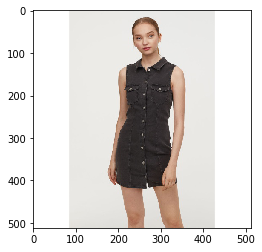

In [59]:
plt.imshow(x[0].transpose(0, 2).transpose(0,1).data.numpy())

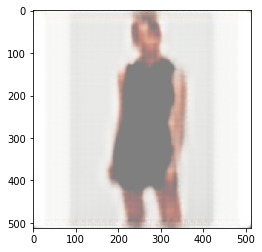

In [60]:
plt.imshow(model(x)[0].transpose(0, 2).transpose(0,1).data.numpy())

## Nearest neighbour search

In [61]:
encoding=[]
for data in train_loader:
    img = data
    img = Variable(img) #.cpu()
  # ===================forward=====================
    encoding.extend(model.encoder(img).data.numpy().reshape(-1, 3*30*30))


In [62]:
len(encoding)

28180

In [21]:
import pickle
x = pickle.load(open('AE2700.pkl','rb'))
encoding = list(x.values())

In [22]:
from sklearn.neighbors import NearestNeighbors
n_neigh = 5
nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(encoding)

In [33]:
distances, indices = nbrs.kneighbors(encoding[795].reshape(1,-1))

In [24]:
distances, indices

(array([[  0.        , 102.34192645, 102.50399378, 106.52052948,
         112.76655174]]), array([[   10, 22858, 27345, 22401, 15398]]))

In [25]:
train_ds.fnames[:5]

[PosixPath('../product_resized/22055.jpg'),
 PosixPath('../product_resized/6109.jpg'),
 PosixPath('../product_resized/19364.jpg'),
 PosixPath('../product_resized/20767.jpg'),
 PosixPath('../product_resized/8961.jpg')]

In [26]:
encode = dict()
for i, idx in enumerate(train_ds.fnames):
    index = str(i).split('/')[-1].split('.')[0]
    encode[index]=encoding[i]

In [87]:
import pickle

In [89]:
pickle.dump(encode, open('AE2700.pkl', 'wb'))

In [92]:
x = pickle.load(open('AE2700.pkl','rb'))

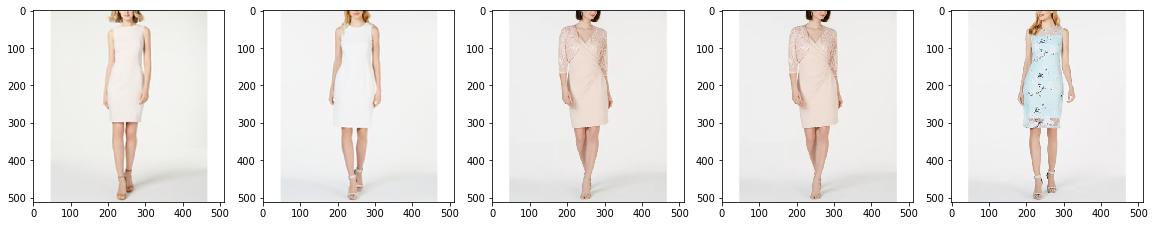

In [34]:
i=2
plt.figure(figsize=(24, 8))
ax = plt.subplot(1, n_neigh+1, 1)
plt.imshow(imread(train_ds.fnames[795]))
for name in indices[0][1:]:
    ax = plt.subplot(1, n_neigh+1, i)
    plt.imshow(imread(train_ds.fnames[name]))
    i+=1

In [117]:
emb = model.encoder(x)

In [136]:
emb.data.numpy().reshape(-1,3*30*30).shape

(32, 2700)

In [24]:
emb2 = emb.data.numpy()

In [25]:
emb2.shape

(32, 16, 504, 504)

In [26]:
emb_final = emb2.reshape(-1, 16*504*504) #resize

In [27]:
emb_final.shape

(32, 4064256)

Then, combine the embeddings with `train_ds.fnames` and merge with the products table and ins_post table.

In [0]:
# Then we can fit the embeddings into KNN model.

## Annoy Tree

In [4]:
from annoy import AnnoyIndex
import pickle

In [5]:
x = pickle.load(open('AE2700.pkl','rb'))

In [52]:
f = 2700
t = AnnoyIndex(f, 'angular')
for k,v in x.items():
    t.add_item(int(k), v)
t.build(100)

True

In [8]:
t.save('train_dot.ann')

True

In [28]:
import seaborn as sns
import math
from PIL import Image
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15.0, 6.0]
def multi_plot(fnames, ncols=3):
    """
        Display multiple images in a grid structure
        fnames: list of file name with full/relative path
    """
    assert ncols != 0
    no_imgs = len(fnames)
    nrows = math.ceil(no_imgs / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3 * nrows),
                             subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for ax, fname in zip(axes.flat, fnames):
        im = Image.open(fname)
        ax.imshow(im)
        ax.set_title(fname.split('/')[-1], size=20)
    plt.tight_layout()
    plt.show()

In [11]:
list(x.keys())[-1]

'28179'

In [29]:
t.get_nns_by_item(28179, 12, )

[24061,
 28179,
 4621,
 14546,
 5675,
 16917,
 24119,
 1115,
 1938,
 10324,
 19812,
 23210]

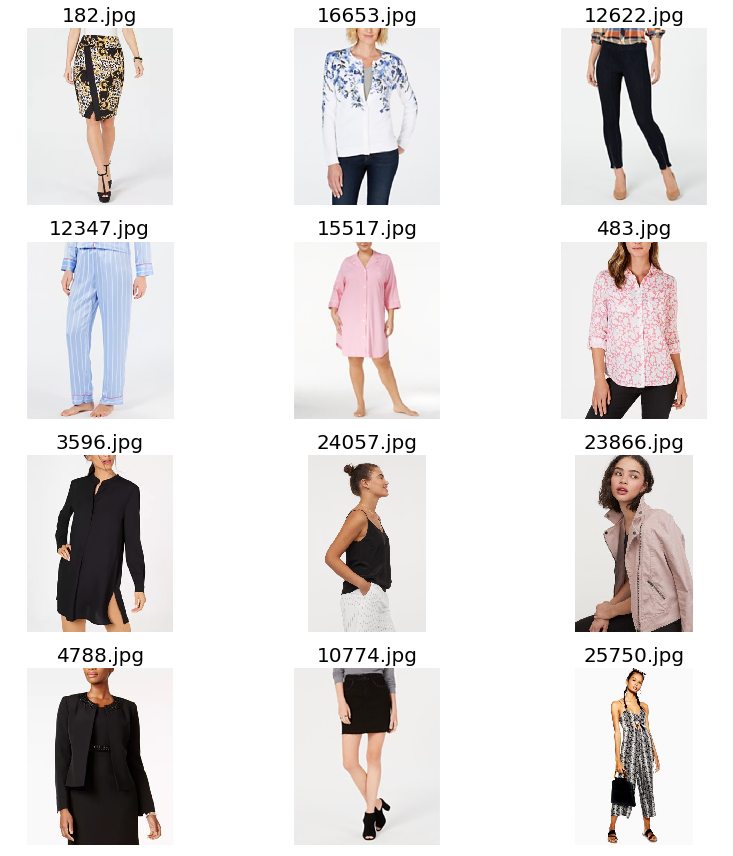

In [57]:
multi_plot([f'../product_resized//{i}.jpg' for i in t.get_nns_by_item(182, 12, search_k=10)])